In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import pylab as plt
import time
import re
import glob, os
from Cython_lib.Brusselator_cython import Brusselator_loopProgress
from Cython_lib.Brusselator_cython import Brusse_Barato_loopProgress
import seaborn as sns

# Brusselator 
## Brusselator used by [arxiv.1804.01080](https://arxiv.org/abs/1804.01080)
<img src="image_note/Brusselator_B.png">
### Determistic and stochastic simulations

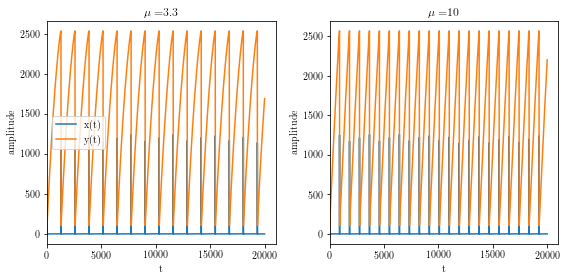

In [2]:
v =100.0
mu=3.3;
k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=10**(-mu)*k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
def Brusse_Barato(Y, t,mu):
    k_2=10**(-mu)*k_1*k2/k1;
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k3*(x**2)*y/v**2-k_3*(x**3)/v**2, k2*b-k_2*y+k_3*(x**3)/v**2-k3*(x**2)*y/v**2])
    return dYdt

t = np.linspace(0, 20000, 100000)
Y0 = [2*v, 1*v] # the intials 

t0=1000000
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,2, figsize=(8, 4))
axs = ax.ravel()
i=0
mu_list=[3.3,10]
for ax, mu in zip(axs, mu_list):
    sol = odeint(Brusse_Barato, Y0, t, args=(mu,))
    ax.plot(t[0:t0], sol[0:t0, 0], label='x(t)')
    ax.plot(t[0:t0], sol[0:t0, 1], label='y(t)')
    ax.set_xlim(left=0)
    ax.set_title(r"$\displaystyle\mu=$"+str(mu))
    if i==0:
        ax.legend(loc='best')
    i=i+1    
    ax.set_xlabel('t')
    ax.set_ylabel('amplitude')
plt.tight_layout()    
fig.savefig('Brusselator_Figures//Brusse_Barato_determinstic.pdf',dpi=100)
plt.show()


In [ ]:
v =10000.0
mu=3;

k1=0.1;
k_1=1.;
k2=0.1;
k3=1.;
k_3=1.;
k_2=10**(-mu)*k_1*k2/k1;
a = 0.1*v; 
b = 0.3*v;
print k_2
par = np.array([a, b, k1, k2, k3, k_1, k_2, k_3])
def Brusse_Barato(Y, t,par, v):
    [a, b, k1, k2, k3, k_1, k_2, k_3]=par
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k3*(x**2)*y/v**2-k_3*(x**3)/v**2, k2*b-k_2*y+k_3*(x**3)/v**2-k3*(x**2)*y/v**2])
    return dYdt
t_f=10000.;N_t=10.*t_f;
T_d = np.linspace(0, t_f, N_t)
Y0 = [2*v, 1*v] # the intials 
sol = odeint(Brusse_Barato, Y0, T_d, args=(par,v))
xt_d=sol[:, 0]; yt_d=sol[:, 1]

print ('start stochastic simulation')
step=1.0
Duration =20000.0
numberofrealisations=int(Duration*step);

par = np.array([a, b, k1, k2, k3, k_1, k_2, k_3])
par_ini = np.array([int(2*v),int(v),v, step])
win_threshold1, win_threshold2 = int(np.mean(xt_d))+1, int(np.mean(yt_d));
filename1 = 'Brusselator_data/'+'Brusse_Barato_Data'+'mu_'+str(mu)+'_size_'+str(v)+'_.csv'
filename2 = 'Brusselator_data/'+'Brusse_Barato_FPT'+'mu_'+str(mu)+'_size_'+str(v)+'_.csv'
filename3 = 'Brusselator_data/'+'Brusse_Barato_FPTDirect'+'mu_'+str(mu)+'_size_'+str(v)+'_.csv'
time0 =time.time()
Brusse_Barato_loopProgress(filename1,filename2,filename3, numberofrealisations,win_threshold1, win_threshold2, par, par_ini)
print ('stochastic finished', time.time()-time0)

df1=pd.read_csv(filename1, sep=',')
T_s=df1[df1.keys()[0]].values
keys= df1.keys()
xt_s, yt_s = df1[df1.keys()[1]].values, df1[df1.keys()[2]].values


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(1,2,figsize=(10, 5))
ax=axs[0]
ax.plot(T_d, xt_d, label='x(t)')
ax.plot(T_d, yt_d, label='y(t)')
ax.scatter(T_s, xt_s, label='x(t)',s=1)
ax.scatter(T_s, yt_s, label='y(t)',s=1)
ax.set_xlim([0,3000])
ax.legend()

ax=axs[1]
ax.plot(xt_s, yt_s) 
ax.plot(xt_d, yt_d)
ax.set_xlim(left=0)
ax.set_title(r"$\displaystyle\mu=$"+str(mu))
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()    
fig_name='Brusselator_Figures/Brusse_Barato_determinstic_stcho_'+'mu_'+str(mu)+'_size_'+str(v)+'.pdf'
fig.savefig(fig_name,dpi=100)
plt.show()

0.001
start stochastic simulation


/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [3]:
print a*k1,k_1*x,k3*(x**2)*y/v**2,k_3*(x**3)/v**2

10.0

NameError: name 'x' is not defined

## Brusselator used by [Nature Communications 9.1 (2018): 1434.](https://www.nature.com/articles/s41467-018-03826-4)
<img src="image_note/Brusselator_cao.png">

### Determistic and stochastic simulations
Several cases that have differnet oscilation period
* case1: $k_2=10$, $k_{-2}=0.5$   
* case2: $k_2=10$, $k_{-2}=0.1$
* case3: $k_2=10$, $k_{-2}=0.0001$
* case4: $k_2=100$, $k_{-2}=0.1$

/Users/wenpingcui/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


start stochastic simulation
('stochastic finished', 380.53851795196533)
[ 2000.   755.   389. ...,   417.   430.   443.]


No handlers could be found for logger "matplotlib.legend"


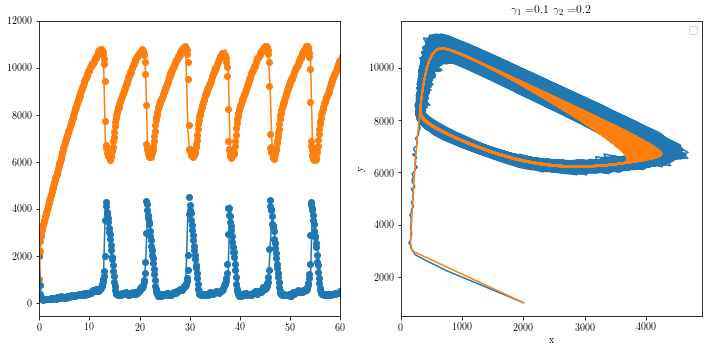

In [2]:
v =1000.0
gamma1=0.1;
gamma2=0.2;
k1=1.;
k_1=1.;
k2=1.;
k3=1.;
k_3=1.;
k_2=1.;
a = 1.*v; 
b = 1.*v;
d = 1.*v;
def Brusse(Y, t, gamma1, gamma2,v):
    k2=1./gamma1;
    k_2=1.*gamma2;
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k_2*d*y/v-k2*b*x/v+k3*x**2*y/v**2-k_3*x**3/v**2, k2*b*x/v-k_2*d*y/v+k_3*x**3/v**2-k3*x**2*y/v**2])
    return dYdt
t_f=400.;N_t=1000.;
T_d = np.linspace(0, t_f, N_t)
Y0 = [2*v, 1*v] # the intials 
t0=int(100/t_f*N_t)
sol = odeint(Brusse, Y0, T_d, args=(gamma1, gamma2, v))
xt_d=sol[:, 0]; yt_d=sol[:, 1]


print ('start stochastic simulation')
step=10.0
Duration =20000.0
numberofrealisations=int(Duration*step);
k2=1./gamma1;
k_2=1.*gamma2;
par = np.array([a, b, d, k1, k2, k3, k_1, k_2, k_3])
par_ini = np.array([int(2*v),int(v),v, step])
win_threshold1, win_threshold2 = int(np.mean(xt_d))+1, int(np.mean(yt_d));
filename1 = 'Brusselator_data/'+'Data'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
filename2 = 'Brusselator_data/'+'FPT'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
filename3 = 'Brusselator_data/'+'FPTDirect'+'gamma1_'+str(gamma1)+'_gamma2_'+str(gamma2)+'_size_'+str(v)+'_.csv'
time0 =time.time()
Brusselator_loopProgress(filename1,filename2,filename3, numberofrealisations,win_threshold1, win_threshold2, par, par_ini)
print ('stochastic finished', time.time()-time0)

df1=pd.read_csv(filename1, sep=',')
T_s=df1[df1.keys()[0]].values
keys= df1.keys()
xt_s, yt_s = df1[df1.keys()[1]].values, df1[df1.keys()[2]].values
print (xt_s)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, axs = plt.subplots(1,2,figsize=(10, 5))
ax=axs[0]

ax.plot(T_d, xt_d, label='x(t)')
ax.plot(T_d, yt_d, label='y(t)')
ax.scatter(T_s, xt_s, label='x(t)')
ax.scatter(T_s, yt_s, label='y(t)')
ax.set_xlim([0,60])
ax=axs[1]
ax.plot(xt_s, yt_s) 
ax.plot(xt_d, yt_d)
ax.set_xlim(left=0)
ax.set_title(r"$\displaystyle\gamma_1=$"+str(gamma1)+' '+r"$\displaystyle\gamma_2=$"+str(gamma2))
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()    
fig_name='Brusselator_Figures/Brusselator_determinstic.pdf'
fig.savefig(fig_name,dpi=100)
plt.show()

In [52]:
v =10.0
k1=1.;
k_1=1.;
k2=1.;
k3=1.;
k_3=1.;
k_2=1.;
a = 1.*v; 
b = 1.*v;
c = 1.*v;
def Brusse(Y, t, gamma1, gamma2,v):
    k2=1./gamma1;
    k_2=1.*gamma2;
    x, y = Y
    dYdt = np.array([a*k1-k_1*x+k_2*c*y/v-k2*b*x/v+k3*x**2*y/v**2-k_3*x**3/v**2, k2*b*x/v-k_2*c*y/v+k_3*x**3/v**2-k3*x**2*y/v**2])
    return dYdt

0.36787944117144233

In [3]:
import os
import os.path

for dirpath, dirnames, filenames in os.walk("."):
    for filename in [f for f in filenames if f.endswith(".log")]:
        print os.path.join(dirpath, filename)